In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import os

In [2]:
sys.getrecursionlimit()

3000

In [3]:
sys.setrecursionlimit(150000)

In [4]:
os.getcwd()

'C:\\Users\\Henry\\Documents\\python\\Challenge'

In [5]:
M1 = pd.read_csv(r'movies.csv')
M1

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
10324,146684,Cosmic Scrat-tastrophe (2015),Animation|Children|Comedy
10325,146878,Le Grand Restaurant (1966),Comedy
10326,148238,A Very Murray Christmas (2015),Comedy
10327,148626,The Big Short (2015),Drama


In [6]:
M1a = pd.DataFrame(M1)
M1a

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
10324,146684,Cosmic Scrat-tastrophe (2015),Animation|Children|Comedy
10325,146878,Le Grand Restaurant (1966),Comedy
10326,148238,A Very Murray Christmas (2015),Comedy
10327,148626,The Big Short (2015),Drama


In [7]:
M1a.genres.unique()

array(['Adventure|Animation|Children|Comedy|Fantasy',
       'Adventure|Children|Fantasy', 'Comedy|Romance',
       'Comedy|Drama|Romance', 'Comedy', 'Action|Crime|Thriller',
       'Adventure|Children', 'Action', 'Action|Adventure|Thriller',
       'Comedy|Horror', 'Adventure|Animation|Children', 'Drama',
       'Action|Adventure|Romance', 'Crime|Drama', 'Drama|Romance',
       'Action|Comedy|Crime|Drama|Thriller', 'Comedy|Crime|Thriller',
       'Crime|Drama|Horror|Mystery|Thriller', 'Drama|Sci-Fi',
       'Children|Drama', 'Adventure|Drama|Fantasy|Mystery|Sci-Fi',
       'Mystery|Sci-Fi|Thriller', 'Adventure|Romance|IMAX', 'Drama|War',
       'Action|Crime|Drama', 'Action|Adventure|Fantasy',
       'Comedy|Drama|Thriller', 'Mystery|Thriller',
       'Animation|Children|Drama|Musical|Romance',
       'Crime|Mystery|Thriller', 'Adventure|Drama', 'Children|Comedy',
       'Drama|Mystery', 'Drama|Thriller', 'Comedy|Crime',
       'Action|Sci-Fi|Thriller', 'Action|Comedy|Horror|Thriller'

In [8]:
nM1a = pd.DataFrame(M1a.genres.str.split('|').tolist(), index = M1a.movieId).stack()
nM1a

movieId   
1        0             Adventure
         1             Animation
         2              Children
         3                Comedy
         4               Fantasy
                     ...        
146684   2                Comedy
146878   0                Comedy
148238   0                Comedy
148626   0                 Drama
149532   0    (no genres listed)
Length: 23114, dtype: object

In [9]:
nM1a.columns = ['movieId', 'level_1', 'Genres']
nM1a

movieId   
1        0             Adventure
         1             Animation
         2              Children
         3                Comedy
         4               Fantasy
                     ...        
146684   2                Comedy
146878   0                Comedy
148238   0                Comedy
148626   0                 Drama
149532   0    (no genres listed)
Length: 23114, dtype: object

In [10]:
nM1a = nM1a.reset_index()
nM1a

,movieId,level_1,0
0,1,0,Adventure
1,1,1,Animation
2,1,2,Children
3,1,3,Comedy
4,1,4,Fantasy
...,...,...,...
23109,146684,2,Comedy
23110,146878,0,Comedy
23111,148238,0,Comedy
23112,148626,0,Drama


In [11]:
nM1a.columns = ['movieId', 'level_1', 'Genres']
nM1a

,movieId,level_1,Genres
0,1,0,Adventure
1,1,1,Animation
2,1,2,Children
3,1,3,Comedy
4,1,4,Fantasy
...,...,...,...
23109,146684,2,Comedy
23110,146878,0,Comedy
23111,148238,0,Comedy
23112,148626,0,Drama


In [12]:
nM1a.Genres.unique()

array(['Adventure', 'Animation', 'Children', 'Comedy', 'Fantasy',
       'Romance', 'Drama', 'Action', 'Crime', 'Thriller', 'Horror',
       'Mystery', 'Sci-Fi', 'IMAX', 'War', 'Musical', 'Documentary',
       'Western', 'Film-Noir', '(no genres listed)'], dtype=object)

In [13]:
nM1a['Genres'].isnull().sum()

0

In [14]:
mgen = nM1a['Genres'].value_counts()
mgen

Drama                 5220
Comedy                3515
Thriller              2187
Romance               1788
Action                1737
Crime                 1440
Adventure             1164
Horror                1001
Sci-Fi                 860
Mystery                675
Fantasy                670
Children               540
War                    503
Documentary            415
Musical                409
Animation              401
Western                235
Film-Noir              195
IMAX                   152
(no genres listed)       7
Name: Genres, dtype: int64

In [15]:
nMgen = pd.DataFrame(mgen)
nMgen

,Genres
Drama,5220
Comedy,3515
Thriller,2187
Romance,1788
Action,1737
Crime,1440
Adventure,1164
Horror,1001
Sci-Fi,860
Mystery,675


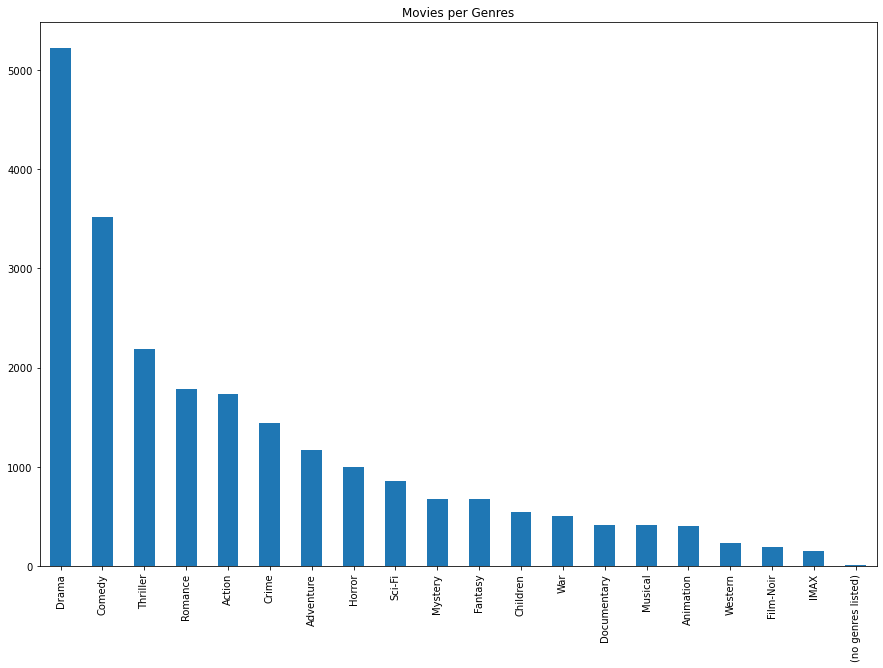

In [16]:
plt.rcParams['figure.figsize'] = (15, 10)
nM1a['Genres'].value_counts().plot(kind = 'bar', title = 'Movies per Genres' )

In [17]:
R1 = pd.read_csv(r'ratings.csv')
R1

,userId,movieId,rating,timestamp
0,1,16,4.0,1217897793
1,1,24,1.5,1217895807
2,1,32,4.0,1217896246
3,1,47,4.0,1217896556
4,1,50,4.0,1217896523
...,...,...,...,...
105334,668,142488,4.0,1451535844
105335,668,142507,3.5,1451535889
105336,668,143385,4.0,1446388585
105337,668,144976,2.5,1448656898


In [18]:
R1a = pd.DataFrame(R1)
R1a

,userId,movieId,rating,timestamp
0,1,16,4.0,1217897793
1,1,24,1.5,1217895807
2,1,32,4.0,1217896246
3,1,47,4.0,1217896556
4,1,50,4.0,1217896523
...,...,...,...,...
105334,668,142488,4.0,1451535844
105335,668,142507,3.5,1451535889
105336,668,143385,4.0,1446388585
105337,668,144976,2.5,1448656898


In [19]:
movies = R1a.merge(nM1a, on = 'movieId')
movies

,userId,movieId,rating,timestamp,level_1,Genres
0,1,16,4.0,1217897793,0,Crime
1,1,16,4.0,1217897793,1,Drama
2,9,16,4.0,842686699,0,Crime
3,9,16,4.0,842686699,1,Drama
4,12,16,1.5,1144396284,0,Crime
...,...,...,...,...,...,...
281899,668,140816,2.5,1443288791,0,Comedy
281900,668,140816,2.5,1443288791,1,Drama
281901,668,141472,2.5,1442679119,0,(no genres listed)
281902,668,142488,4.0,1451535844,0,Thriller


In [20]:
movies.columns

Index(['userId', 'movieId', 'rating', 'timestamp', 'level_1', 'Genres'], dtype='object')

In [21]:
Movies = pd.DataFrame(movies)
Movies

,userId,movieId,rating,timestamp,level_1,Genres
0,1,16,4.0,1217897793,0,Crime
1,1,16,4.0,1217897793,1,Drama
2,9,16,4.0,842686699,0,Crime
3,9,16,4.0,842686699,1,Drama
4,12,16,1.5,1144396284,0,Crime
...,...,...,...,...,...,...
281899,668,140816,2.5,1443288791,0,Comedy
281900,668,140816,2.5,1443288791,1,Drama
281901,668,141472,2.5,1442679119,0,(no genres listed)
281902,668,142488,4.0,1451535844,0,Thriller


In [22]:
HMovies = Movies.loc[Movies['rating'] >= 3.0]
HMovies

,userId,movieId,rating,timestamp,level_1,Genres
0,1,16,4.0,1217897793,0,Crime
1,1,16,4.0,1217897793,1,Drama
2,9,16,4.0,842686699,0,Crime
3,9,16,4.0,842686699,1,Drama
6,24,16,4.0,963468757,0,Crime
...,...,...,...,...,...,...
281890,668,133583,3.0,1435891577,0,Drama
281894,668,134881,3.0,1447644996,0,Drama
281895,668,136890,4.0,1436068929,0,Drama
281902,668,142488,4.0,1451535844,0,Thriller


C:\Users\Henry\AppData\Roaming\Python\Python38\site-packages\IPython\core\pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


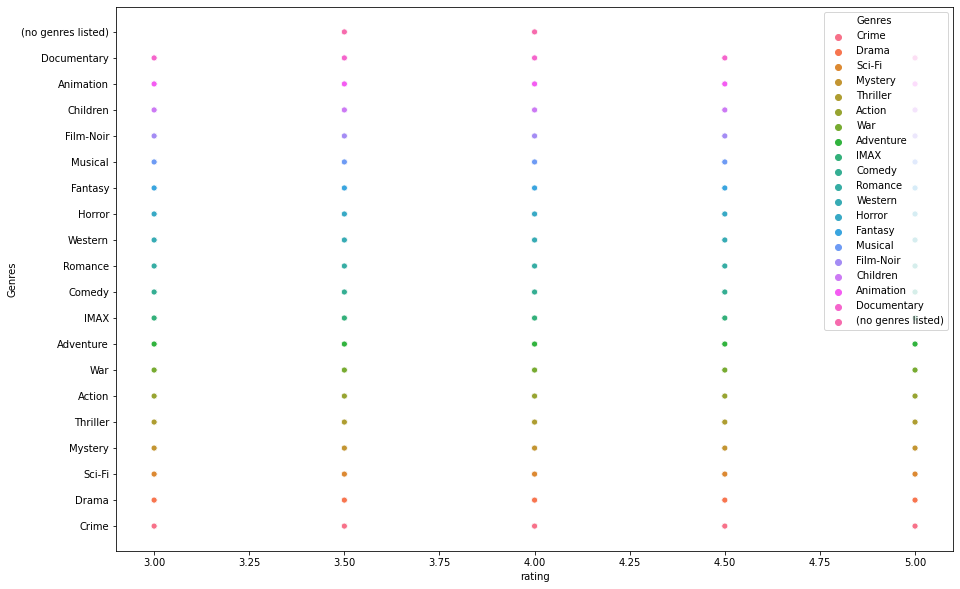

In [23]:
High_Rating = sns.scatterplot(HMovies['rating'], HMovies['Genres'], hue = "Genres", data = HMovies)
High_Rating